In [1]:
#http://calebmadrigal.com/monte-carlo-in-python/

In [2]:
# Monte Carlo Estimation is method of numerically estimating things 
# which we don't (or can't) calculate numerically by randomly generating samples. 


In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

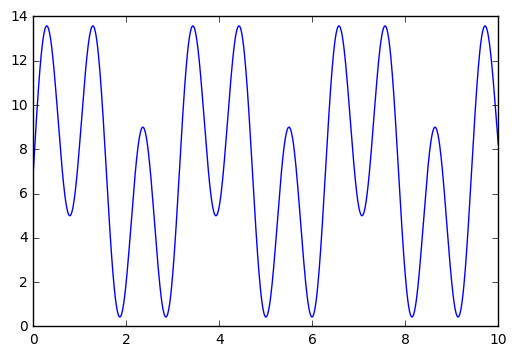

In [13]:
# The area under a curve
f = lambda x: 5 * np.sin(6 * x) + 3 * np.sin(2 * x) + 7
x = np.linspace(0, 10, 1000)
y = f(x)

_ = plt.plot(x,y)

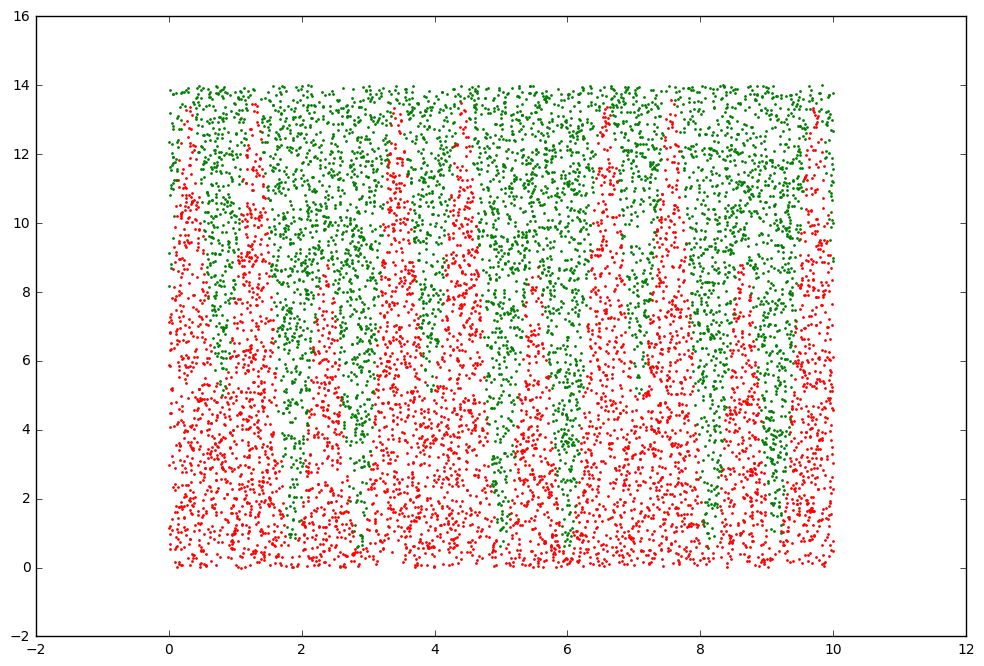

In [21]:
import random

rect_width = 10
rect_height = 14
NUM_POINTS = 10000 # increase for better accuracy, like throwing dart

rand_x = lambda: random.uniform(0, rect_width)
rand_y = lambda: random.uniform(0, rect_height)

points = [(rand_x(), rand_y()) for i in xrange(NUM_POINTS)]
points_under = filter(lambda point: point[1] <= f(point[0]), points)
points_above = list(set(points) - set(points_under))

# Separate x's and y's to pass to scatter function.
(under_x, under_y) = zip(*points_under) #split the zipped list with *
(over_x, over_y) = zip(*points_above)

fig = plt.figure()
fig.set_size_inches(12, 8)
_ = plt.scatter(under_x, under_y, s=1, color='red')
_ = plt.scatter(over_x, over_y, s=1, color='green')

In [22]:
# Area = area of domain rectangle * num_points_under/num_points_total
area = rect_width * rect_height * len(points_under)*1.0/len(points)
print "Estimate of area under the curve:", area

# Sanity check: it looks like the area under is about half of the rectangle, 
# and the rectangle
# area is 10*14 = 140, so it should be around 70.

Estimate of area under the curve: 71.694


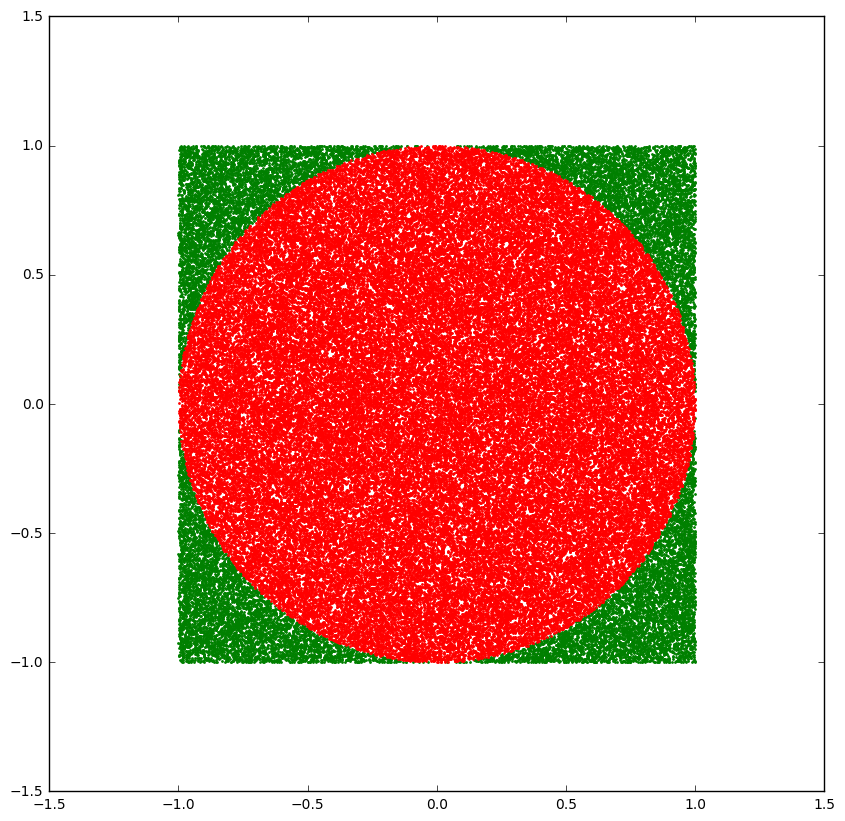

In [26]:
# Monte Carlo Estimation of π
# Let's draw a circle by randomly generating points in the space (xx,yy) such that x2+y2≤1

import random

NUM_POINTS = 100000

# Randomly generate points (x[i], y[i]) such that -1 <= x[i] = 1 and -1 <= y[i] <= 1.
x = [random.uniform(-1,1) for i in xrange(NUM_POINTS)]
y = [random.uniform(-1,1) for i in xrange(NUM_POINTS)]

circle_x = []
circle_y = []

outsiders_x = []
outsiders_y = []

# Determine which points are inside the circle (and for visualization purposes, also
# determine which are outside the circle).
for i in xrange(NUM_POINTS):
    if x[i]**2 + y[i]**2 <= 1:
        circle_x.append(x[i])
        circle_y.append(y[i])
    else:
        outsiders_x.append(x[i])
        outsiders_y.append(y[i])

# Plot it.
fig = plt.figure()
fig.set_size_inches(10, 10)
_ = plt.scatter(outsiders_x, outsiders_y, s=1, color='green')
_ = plt.scatter(circle_x, circle_y, s=1, color='red')


In [27]:
# The area of a circle is πr2.
# Since our circle only has a radius of 1, its area is π.
# The area of the square is 2∗2=4.
# The ratio of the area of the circle to the area of the square 
# should be the same as the ratio of the 
# points inside the circle to the points inside the square
# So the ratio of π/4=circle points/total points. 
# So π=4 * circle points / total points 

print "Estimate of area of circle (pi):", 4 * (len(circle_x)*1.0 / len(x))

Estimate of area of circle (pi): 3.13952
